<h1>Communicate Data Findings (Dataset: Loan Data from Prosper)

<h1> Data Wrangling

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
loan=pd.read_csv('prosperLoanData.csv')

In [3]:
#Check number of rows and columns
loan.shape

(113937, 81)

In [4]:
#Get an overview of data
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#Examine missing values and datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
#Check for duplicates
sum(loan.duplicated())

0

In [7]:
#Check number of missing values for prosper score
loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
#Storing only those rows where prosper score is present in a different dataframe
loan_new=loan[loan['ProsperScore'].isnull()==False]

In [9]:
loan_new.shape

(84853, 81)

In [10]:
sum(loan_new['ListingKey'].duplicated())

871

In [11]:
sum(loan_new['ListingNumber'].duplicated())

871

In [12]:
#Dropping columns which have many missing values and columns not useful for our analysis 
loan_new.drop(['ListingKey','ListingNumber','CreditGrade','CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled','OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 63 columns):
ListingCreationDate                   84853 non-null object
Term                                  84853 non-null int64
LoanStatus                            84853 non-null object
ClosedDate                            26005 non-null object
BorrowerAPR                           84853 non-null float64
BorrowerRate                          84853 non-null float64
LenderYield                           84853 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)                 84853 non-null object
ProsperScore                          84853 non-null float64
ListingCategory (numeric)             84853 non-null int64
BorrowerState                         84853 

In [14]:
#Dropping Closed Date because it contains many missing values 
loan_new.drop(['ClosedDate'],axis=1,inplace=True)

In [15]:
#Confirming changes
loan_new.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRang

In the data dictionary given for Prosper score loan dataset, it is mentioned that prosper scores are available only after the year 2009. Let us check the start date of the extracted new dataframe.

In [16]:
#Check list creation date starting date
loan_new['ListingCreationDate'].min()

'2009-07-13 18:01:24.347000000'

In [17]:
#check datatypeof List creation
type(loan_new['ListingCreationDate'][1])

str

In [18]:
#Convert the datatype to datetime
loan_new['ListingCreationDate']=pd.to_datetime(loan_new['ListingCreationDate'])

C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#confirming changes
type(loan_new['ListingCreationDate'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# To get insight from this index, we have to convert ListingCategory columns into readable data for ease of understanding. From the Prosper score dictionare.
loan_new.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)
loan_new.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)


C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [21]:
#Creating just one column for Credit score by combinign two columns
loan_new["CreditScoreRangeUpper"]=(loan_new["CreditScoreRangeUpper"] + loan_new["CreditScoreRangeLower"])/2
loan_new.rename(index = str, columns={"CreditScoreRangeUpper": "CreditScore"}, inplace=True)
loan_new.drop(columns = "CreditScoreRangeLower", inplace = True)

C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#Check categorical columns
cat=loan_new.select_dtypes(exclude=['int', 'float']).columns
cat

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ProsperRating (Alpha)',
       'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'OpenRevolvingAccounts', 'IncomeRange',
       'IncomeVerifiable', 'LoanMonthsSinceOrigination', 'LoanNumber',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MemberKey', 'Recommendations', 'InvestmentFromFriendsCount',
       'Investors'],
      dtype='object')

In [23]:
#Check numerical columns
num=loan_new.select_dtypes(include=['int', 'float']).columns
num

Index(['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperScore', 'EmploymentStatusDuration', 'CreditScore',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
       'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Percen

In [199]:
loan_new.to_csv('loan_new.csv',index=False)

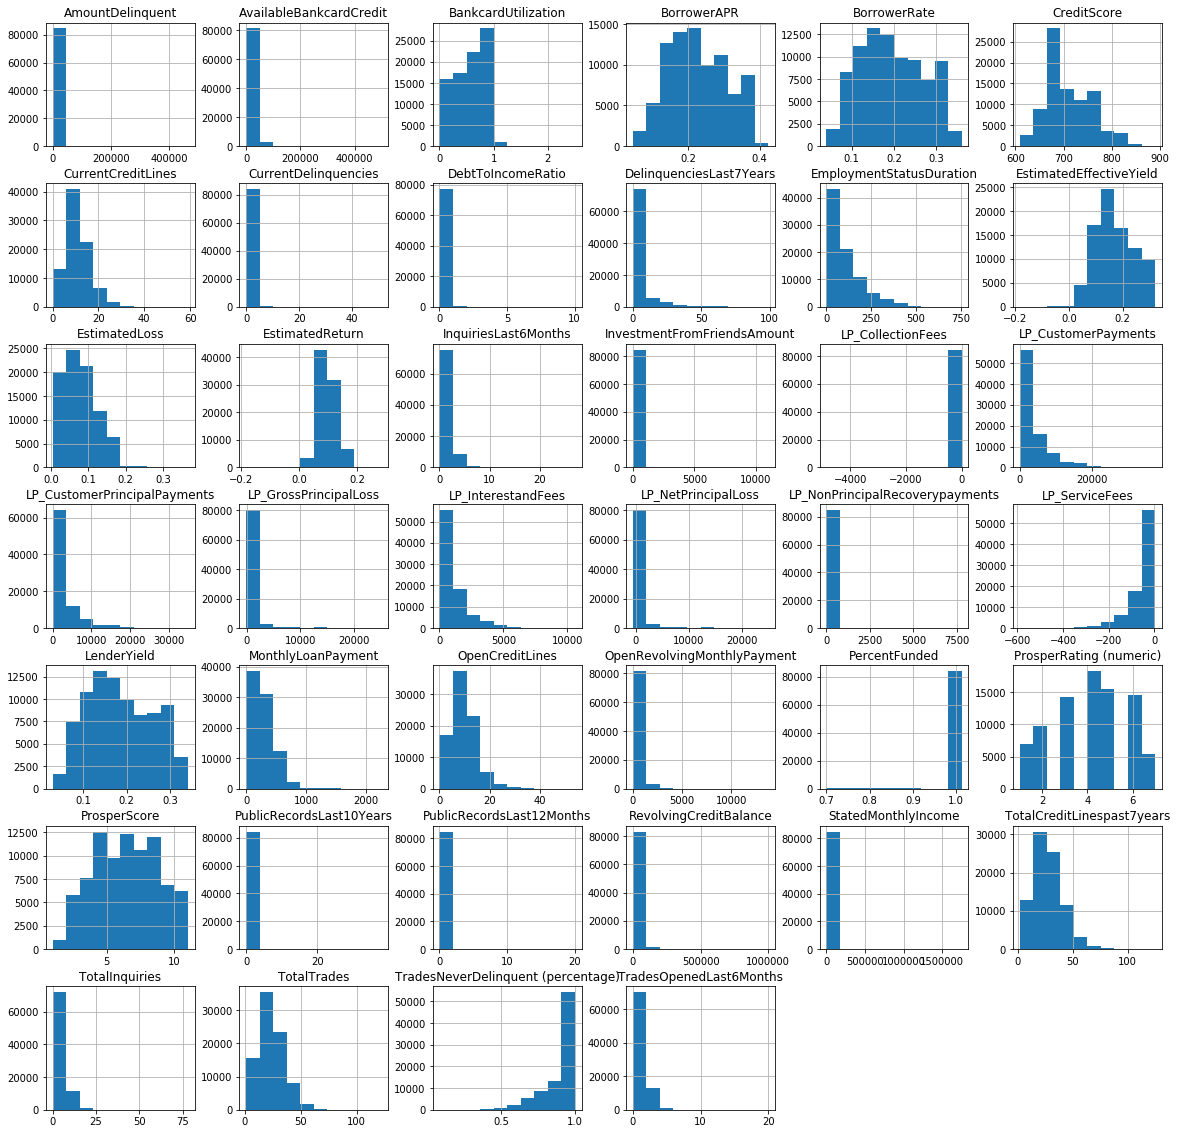

In [24]:
loan_new.hist(num,figsize=(20,20));

<h3>What is the structure of this dataset?

The dataset consists of around 113937 records and 81 columns. I have created a new dataframe which includes only those records where there is a prosper rating assigned. Hence, the new dataset now has around 84853 records. Also, for the purpose of quality in analysis and visualizations, I have retained only few columns which seemed appropriate.

<h3>What is/are the main feature(s) of interest in your dataset?

I am interested in the two below:
- Variables that help to decide the Borrower APR while granting a loan
- Identify variables which affect prosper grade for a given borrower.

<h3>What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the below few variables might help me:
- BorrowerAPR
- Prosper Grade
- Delinquent Bank accounts
- Income Range 
- Occupation
- Loan Status
- Prosper Score
- Listing Category
- Available Bank credit 
- Credit Score

# Univariate Exploration 

<h2>1.Exploring BorrowerAPR

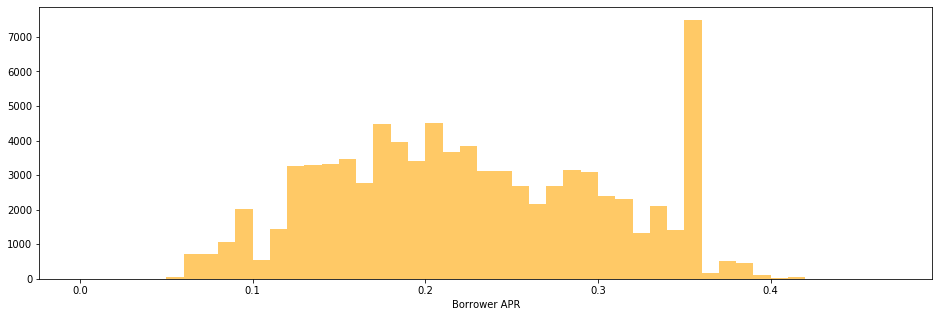

In [25]:
loan_temp=loan_new[['BorrowerAPR','StatedMonthlyIncome','IncomeRange','IncomeVerifiable','ProsperScore','Occupation','IsBorrowerHomeowner','EmploymentStatusDuration','DebtToIncomeRatio','AvailableBankcardCredit','BankcardUtilization']]
bins = np.arange(0, loan_temp['BorrowerAPR'].max()+0.05, 0.01)
plt.figure(figsize=[16, 5])
plt.hist(data = loan_temp, x = 'BorrowerAPR', bins = bins,color='orange',alpha=0.6);
plt.xlabel('Borrower APR');

In [26]:
loan_temp['BorrowerAPR'].describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

<b>The above graph has many peaks with the highest peak at around 35%.It is safe to say that around 7800 people have paid 35% interest. The borrower's Annual percentage rate for the year on an average out of 84853 records  is 22.6%. We also observe that there are some people who pay more than 41% APR. 

In [27]:
#Explore records where BorrowerAPR > 41%
a=loan_temp[loan_temp['BorrowerAPR']>0.41]
a

,BorrowerAPR,StatedMonthlyIncome,IncomeRange,IncomeVerifiable,ProsperScore,Occupation,IsBorrowerHomeowner,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,BankcardUtilization
8750,0.41355,10500.000000,"$100,000+",True,4.0,Professional,True,90.0,0.27,3878.0,0.83
9643,0.41355,2666.666667,"$25,000-49,999",False,4.0,Other,True,5.0,NaN,3462.0,0.90
11003,0.41355,3500.000000,"$25,000-49,999",False,4.0,Other,False,20.0,NaN,167.0,0.58
11658,0.41355,3333.333333,"$25,000-49,999",True,5.0,Tradesman - Electrician,False,172.0,0.05,10.0,0.98
12277,0.41355,5234.250000,"$50,000-74,999",True,5.0,Other,False,180.0,0.01,0.0,0.00
15624,0.41355,4833.333333,"$50,000-74,999",True,1.0,Teacher,False,2.0,2.20,781.0,0.86
17224,0.41355,2500.000000,"$25,000-49,999",False,2.0,Sales - Commission,False,60.0,NaN,0.0,0.00
18473,0.41355,10833.333333,"$100,000+",True,2.0,Professional,True,57.0,0.09,0.0,0.00
19089,0.41355,1400.000000,"$1-24,999",True,1.0,Teacher's Aide,True,100.0,0.26,37.0,0.87
19488,0.41355,3250.000000,"$25,000-49,999",True,4.0,Professional,True,33.0,0.08,126.0,0.98


In [28]:
#Explore records where BorrowerAPR > 41.5%
loan_temp[loan_temp['BorrowerAPR']>0.415]

,BorrowerAPR,StatedMonthlyIncome,IncomeRange,IncomeVerifiable,ProsperScore,Occupation,IsBorrowerHomeowner,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,BankcardUtilization
105889,0.42395,2250.0,"$25,000-49,999",True,4.0,Administrative Assistant,False,36.0,0.08,847.0,0.7


We observe that round 45 rows have been found with APR>41% and there is one record with APR>41.5%.

<h3> Check prosper scores distribution of only those 45 variables

Text(0.5, 0, 'Prosper Score')

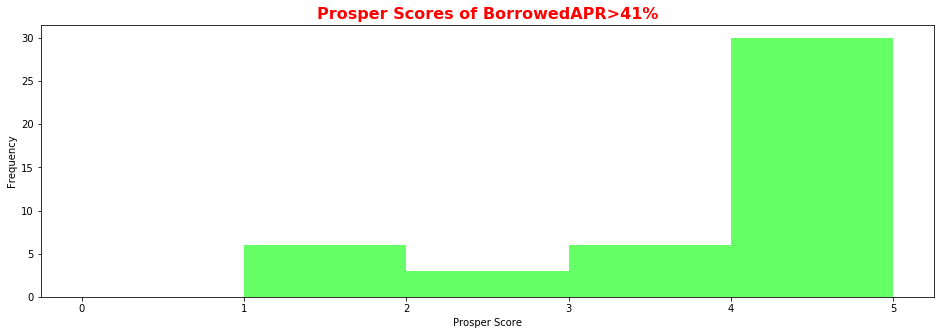

In [29]:
#Visualize the prosper scores
plt.figure(figsize=[16, 5])
bins = np.arange(0, a['ProsperScore'].max()+1, 1)
a['ProsperScore'].plot.hist(bins,color=['lime'],alpha=0.6)
plt.title('Prosper Scores of BorrowedAPR>41%',color='red',fontweight='bold',fontsize=16)
plt.xlabel('Prosper Score')

<h3> Exploring the 45 record's Occupations

Text(0.5, 0, 'count')

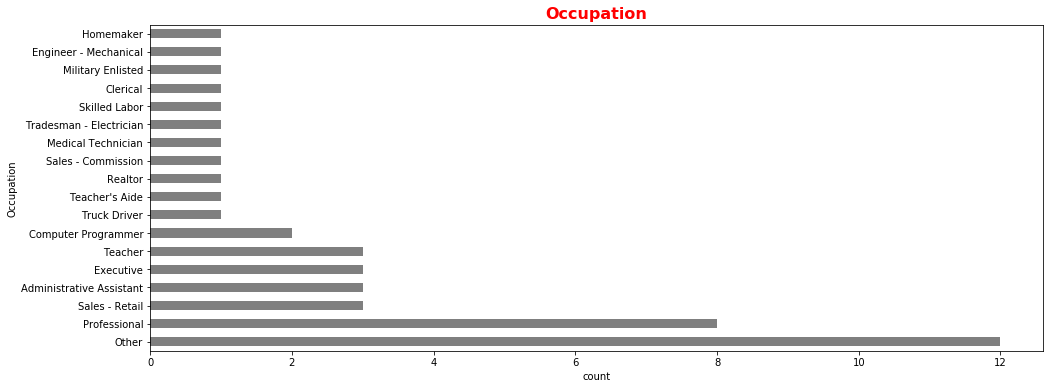

In [30]:
plt.figure(figsize=[16,6])
a['Occupation'].value_counts().plot(kind='barh',color='black',alpha=0.5)
plt.title('Occupation',fontsize=16,fontweight='bold',color='red')
plt.ylabel('Occupation')
plt.xlabel('count')

<h3>Exploring their income range

Text(0, 0.5, 'Count')

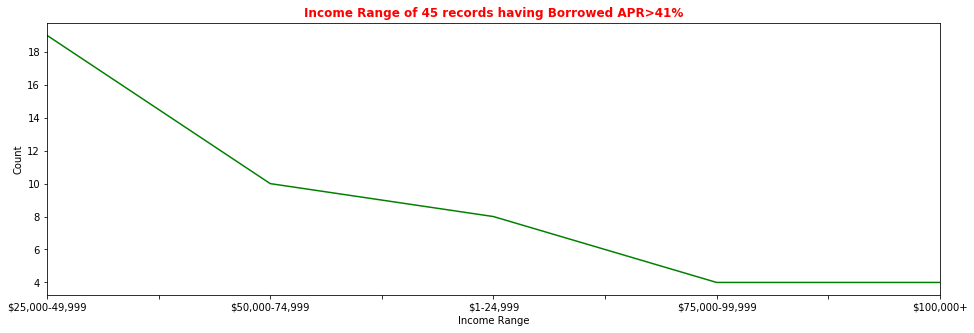

In [31]:
#Set plotting style
#plt.style.use('ggplot')
plt.figure(figsize=[16,5])
a['IncomeRange'].value_counts().plot(color='green')
plt.title('Income Range of 45 records having Borrowed APR>41%',color='Red',fontweight='bold')
plt.xlabel('Income Range')
plt.ylabel('Count')

From the above three graphs, we can conclude the following:
-     The Borrower APR is high at around 41.35% for majority of prosper Scores>4.
-     Nothing much can be concluded by the occupation as there are around 12 records listed as 'Others' followed by 8 records having their occupation as 'Professional'. But, this is not enough to conclude about the high Borrowed APR
-     Majority of the IncomeRange lie in the bracket '25,000- 50,000($)'. 
    

<h2>2. Exploring Prosper Ratings

In [32]:
#Proportion of propser rating (Alpha)
loan_new['ProsperRating (Alpha)'].value_counts(normalize=True)*100

C     21.619742
B     18.362344
A     17.148480
D     16.822033
E     11.543493
HR     8.172958
AA     6.330949
Name: ProsperRating (Alpha), dtype: float64

Text(0, 0.5, '% Prosper Ratings by %')

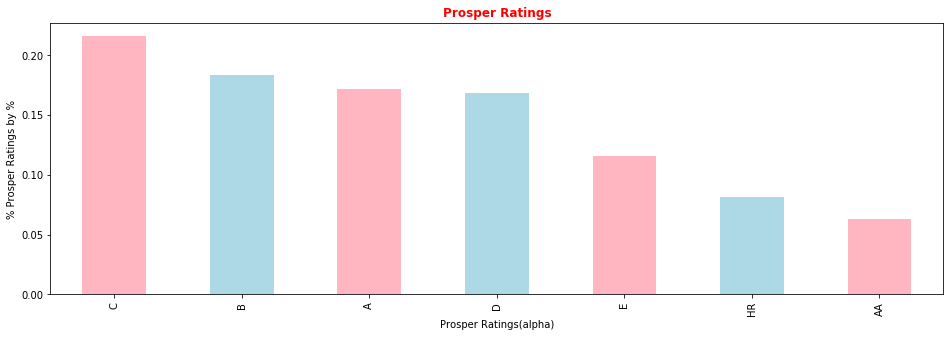

In [33]:
#Plotting the prosper ratings of all the data available
plt.figure(figsize=[16,5])
loan_new['ProsperRating (Alpha)'].value_counts(normalize=True).plot(kind='bar',sort_columns=True,color=['lightpink','lightblue'])
plt.title('Prosper Ratings',color='Red',fontweight='bold')
plt.xlabel('Prosper Ratings(alpha)')
plt.ylabel('% Prosper Ratings by %')

The most frequent rating is C(21.6%) followed by B(18.36%) and A(17.14%)

In [34]:
prosperC=loan_new[loan_new['ProsperRating (Alpha)']=='C']
prosperC

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
7,2013-05-05 06:49:27.493,36,Current,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,4.0,...,-69.21,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
10,2012-05-10 07:04:01.577,60,Current,0.27462,0.2489,0.2389,0.23320,0.0890,0.14420,4.0,...,-214.04,0.00,0.00,0.00,0.00,1.0,0,0,0.0,19
24,2013-12-03 11:34:46.127,36,Current,0.19859,0.1620,0.1520,0.14256,0.0649,0.07766,4.0,...,-6.72,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
28,2013-11-02 16:01:28.050,36,Current,0.20268,0.1660,0.1560,0.14661,0.0624,0.08421,4.0,...,-22.56,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
34,2014-02-24 12:55:20.430,36,Current,0.22966,0.1920,0.1820,0.16810,0.0899,0.07820,4.0,...,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
40,2014-01-27 12:02:57.523,60,Current,0.19630,0.1725,0.1625,0.15163,0.0724,0.07923,4.0,...,-12.33,0.00,0.00,0.00,0.00,1.0,0,0,0.0,3
43,2013-10-08 13:48:43.950,36,Current,0.21290,0.1760,0.1660,0.15519,0.0699,0.08529,4.0,...,-16.30,0.00,0.00,0.00,0.00,1.0,0,0,0.0,5
44,2013-06-20 09:48:03.017,36,Current,0.21025,0.1734,0.1634,0.15360,0.0624,0.09120,4.0,...,-100.60,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
56,2013-09-16 04:38:51.517,36,Current,0.22415,0.1870,0.1770,0.16468,0.0774,0.08728,4.0,...,-60.47,-93.09,0.00,0.00,0.00,1.0,0,0,0.0,77
60,2013-11-02 17:09:05.430,60,Current,0.19323,0.1695,0.1595,0.14963,0.0649,0.08473,4.0,...,-62.33,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1


Text(0.5, 0, 'BorrowerAPR')

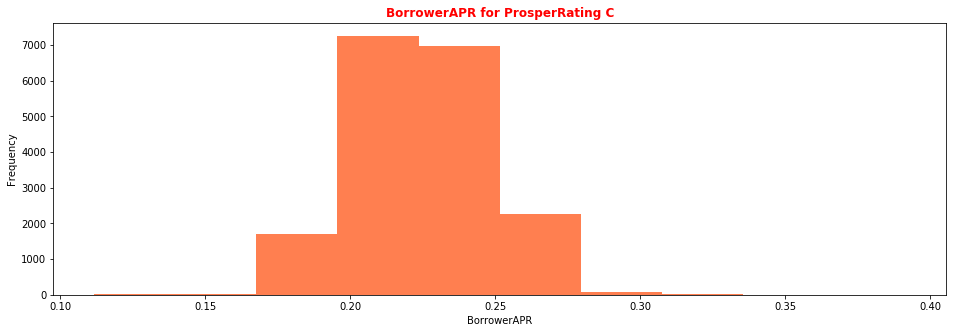

In [120]:
#Plotting prosperC dataset BorrowerAPR
prosperC['BorrowerAPR'].plot.hist(figsize=(16,5),color='coral')
plt.title('BorrowerAPR for ProsperRating C',color='red',fontweight='bold')
plt.xlabel('BorrowerAPR')

Most of the BorrowerAPR for prosper rating C range between 0.17 and 0.27 with majority of them paying an interest between 20-25%.

In [36]:
pgreater=prosperC[prosperC['BorrowerAPR']>0.350]
pgreater

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
425,2009-10-30 18:13:22.503,36,Completed,0.36438,0.340,0.330,0.2570,0.065,0.2570,4.0,...,-21.69,0.0,0.00,0.00,0.0,1.0,0,0,0.0,30
18887,2009-10-04 22:10:14.193,36,Completed,0.37453,0.350,0.340,0.2467,0.085,0.2467,4.0,...,-125.75,0.0,0.00,0.00,0.0,1.0,0,0,0.0,35
26056,2009-11-19 15:07:15.967,36,Completed,0.36945,0.345,0.335,0.2468,0.080,0.2468,4.0,...,-24.66,0.0,0.00,0.00,0.0,1.0,0,0,0.0,39
45459,2010-01-18 13:43:18.073,36,Completed,0.37453,0.350,0.340,0.2667,0.065,0.2667,4.0,...,-32.89,0.0,0.00,0.00,0.0,1.0,0,0,0.0,43
55778,2009-09-29 14:27:23.733,36,Completed,0.36438,0.340,0.330,0.2570,0.065,0.2570,4.0,...,-22.47,0.0,0.00,0.00,0.0,1.0,0,0,0.0,41
96404,2009-07-31 15:15:53.120,36,Completed,0.39153,0.350,0.340,0.2667,0.065,0.2667,4.0,...,-17.68,0.0,0.00,0.00,0.0,1.0,0,0,0.0,17
101732,2010-01-21 04:13:29.433,36,Chargedoff,0.37453,0.350,0.340,0.2467,0.085,0.2467,4.0,...,-94.19,0.0,4690.47,4690.46,0.0,1.0,0,0,0.0,90
111066,2010-01-06 14:25:49.800,36,Completed,0.36716,0.340,0.330,0.2570,0.065,0.2570,4.0,...,-29.46,0.0,0.00,0.00,0.0,1.0,0,0,0.0,43


Text(0.5, 1.0, 'ProsperScore with gradeC where BorrowerAPR > 35%')

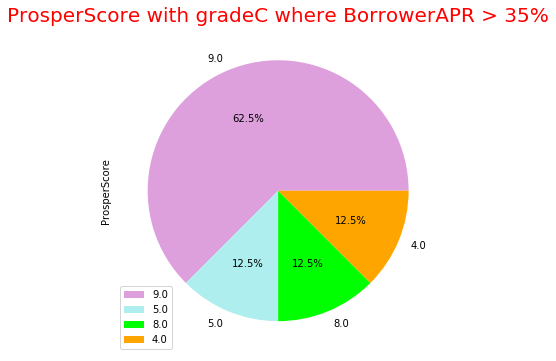

In [37]:
pgreater['ProsperScore'].value_counts().plot(kind='pie',colors=['plum','paleturquoise','lime','orange'],figsize=(6,6),legend=True,autopct='%1.1f%%')
plt.title('ProsperScore with gradeC where BorrowerAPR > 35%',fontsize=20,color='red')

From the above chart, what we see is that majority of people with prosperscore = 9 tend to pay higher borrowedAPR than the rest.

<h2>3. Delinquent Bank accounts

In [38]:
loan1= loan_new[['BorrowerAPR','StatedMonthlyIncome','IncomeRange','IncomeVerifiable','ProsperScore','Occupation','IsBorrowerHomeowner','EmploymentStatusDuration','AmountDelinquent','CurrentDelinquencies','DebtToIncomeRatio','AvailableBankcardCredit','BankcardUtilization']]
loan1.head()

,BorrowerAPR,StatedMonthlyIncome,IncomeRange,IncomeVerifiable,ProsperScore,Occupation,IsBorrowerHomeowner,EmploymentStatusDuration,AmountDelinquent,CurrentDelinquencies,DebtToIncomeRatio,AvailableBankcardCredit,BankcardUtilization
1,0.12016,6125.000000,"$50,000-74,999",True,7.0,Professional,False,44.0,0.0,0.0,0.18,10266.0,0.21
3,0.12528,2875.000000,"$25,000-49,999",True,9.0,Skilled Labor,True,113.0,10056.0,4.0,0.15,30754.0,0.04
4,0.24614,9583.333333,"$100,000+",True,4.0,Executive,True,44.0,0.0,0.0,0.26,695.0,0.81
5,0.15425,8333.333333,"$100,000+",True,10.0,Professional,True,82.0,0.0,0.0,0.36,86509.0,0.39
6,0.31032,2083.333333,"$25,000-49,999",True,2.0,Sales - Retail,False,172.0,0.0,0.0,0.27,1929.0,0.72


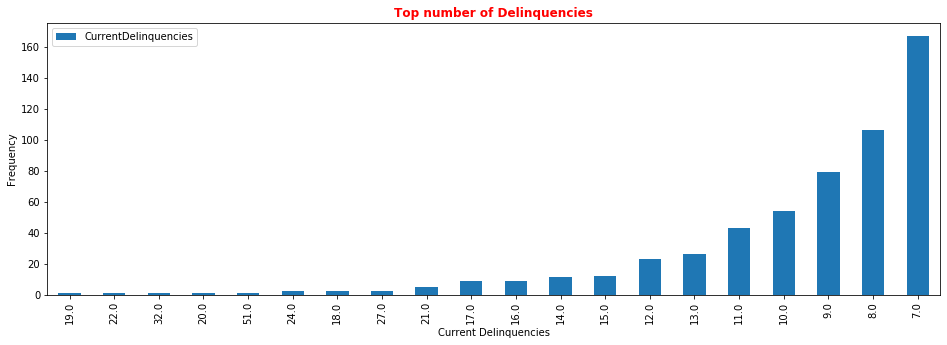

In [39]:
plt.figure(figsize=[16,5])
loan1['CurrentDelinquencies'].value_counts().nsmallest(20).plot(kind='bar')
plt.title('Top number of Delinquencies',fontweight='bold',fontsize=12,color='red')
plt.xlabel('Current Delinquencies')
plt.ylabel('Frequency')
plt.legend()

We see that there is one account which has a delinquency of 51 followed by 32, 27,24 and so on. 

In [40]:
#Fetch records where Current delinquencies are high
temp=loan1[loan1['CurrentDelinquencies']>22]
temp

,BorrowerAPR,StatedMonthlyIncome,IncomeRange,IncomeVerifiable,ProsperScore,Occupation,IsBorrowerHomeowner,EmploymentStatusDuration,AmountDelinquent,CurrentDelinquencies,DebtToIncomeRatio,AvailableBankcardCredit,BankcardUtilization
29794,0.30748,3833.333333,"$25,000-49,999",True,3.0,Other,False,95.0,2901.0,32.0,0.31,31250.0,0.00
39899,0.32538,1658.333333,"$1-24,999",True,2.0,Other,False,37.0,12058.0,27.0,0.21,15792.0,0.12
40430,0.30285,20000.000000,"$100,000+",True,3.0,Executive,True,4.0,172240.0,24.0,0.26,256.0,0.90
82826,0.34621,1658.333333,"$1-24,999",True,2.0,Other,False,17.0,9750.0,27.0,0.22,13743.0,0.28
106180,0.38296,2208.333333,"$25,000-49,999",True,6.0,Food Service Management,True,110.0,4356.0,24.0,0.63,1365.0,0.86
109208,0.17611,5000.000000,"$50,000-74,999",True,8.0,NaN,True,0.0,8918.0,51.0,0.39,25985.0,0.29


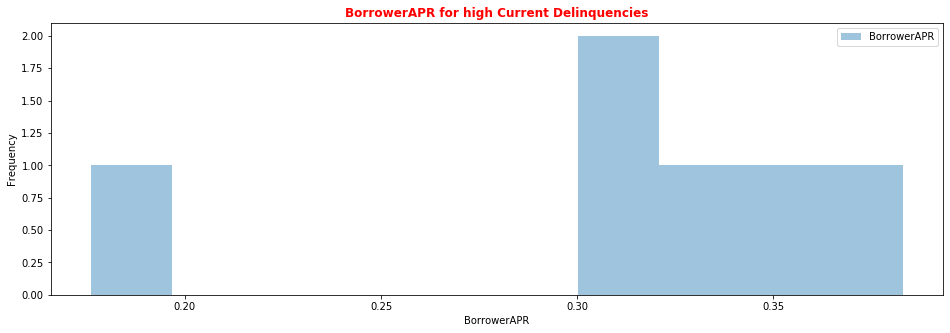

In [41]:
#plotting BorrowedAPR for the records with high number of delinquencies
temp['BorrowerAPR'].plot.hist(figsize=(16,5),alpha=0.43)
plt.title('BorrowerAPR for high Current Delinquencies',fontweight='bold',color='red')
plt.xlabel('BorrowerAPR')
plt.legend()

Text(0.5, 0, 'AmountDelinquent')

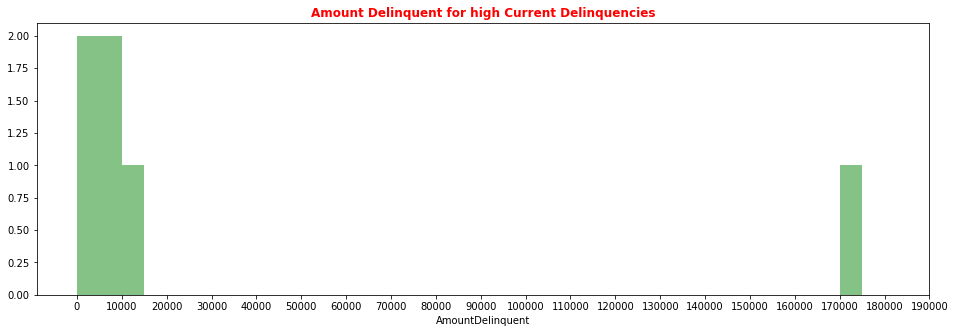

In [42]:
#plotting BorrowedAPR for the records with high number of delinquencies
plt.figure(figsize=[16,5])
bins=np.arange(0,temp['AmountDelinquent'].max()+10000,5000)
plt.hist(data=temp,x='AmountDelinquent',bins=bins,color='green',alpha=0.48)
plt.title('Amount Delinquent for high Current Delinquencies',fontweight='bold',color='red')
plt.xticks(np.arange(0, 200000, 10000))
plt.xlabel('AmountDelinquent')




From the above graph, we see that the amount delinquent lies in the range 0 and 15,000 and there is one exceptional amount which amounts to 175000.This implies that these people have missed paying their dues for many months.

# <h2>4. Occupation

Text(0, 0.5, 'Occupation')

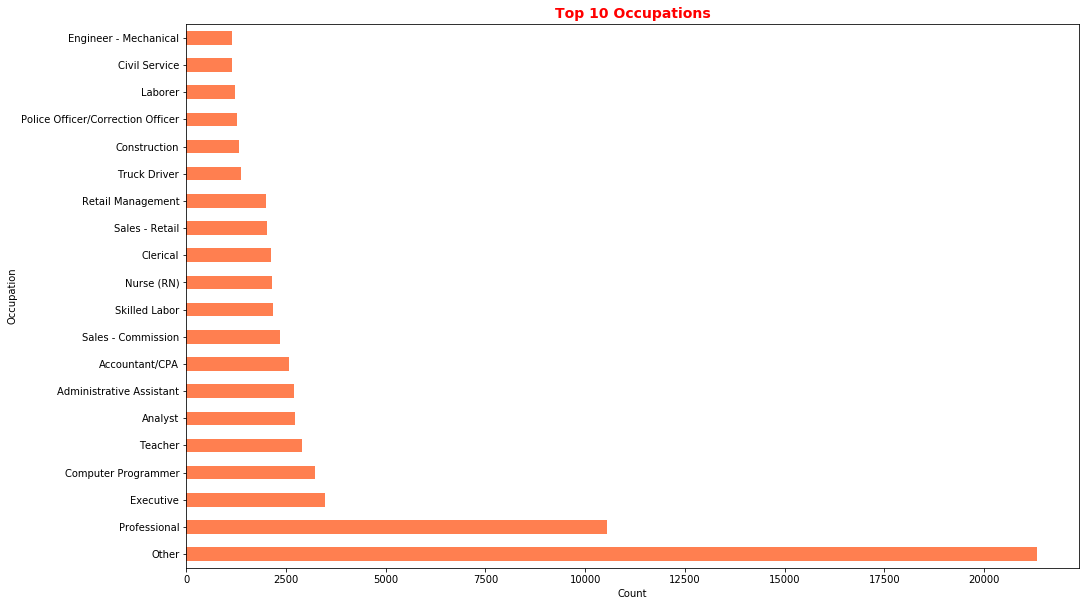

In [43]:
plt.figure(figsize=[16,10])
loan_new['Occupation'].value_counts().nlargest(20).plot(kind='barh',color='coral')
plt.title('Top 10 Occupations',fontweight='bold',color='red',fontsize=14)
plt.xlabel('Count')
plt.ylabel('Occupation')

The top most occupation is 'Professional' followed by 'Executive','Computer Programmer' and the rest.

<h2>5. Income Range

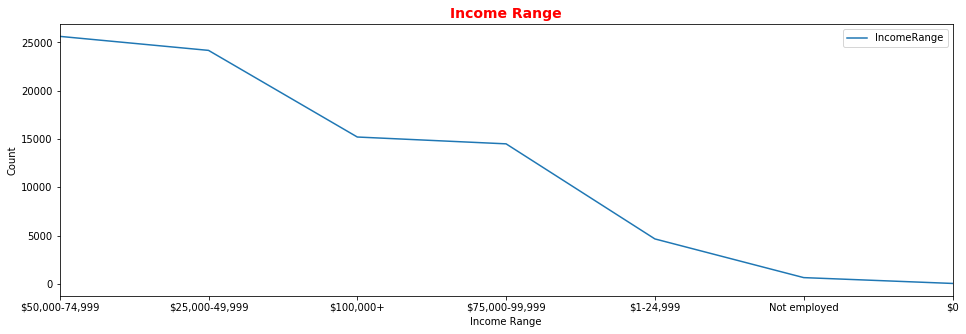

In [97]:
plt.figure(figsize=[16,5])
loan_new['IncomeRange'].value_counts().plot()
plt.title('Income Range',fontweight='bold',color='red',fontsize=14)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.legend()

Majority of the Income range lie between 50,000 and 75000 followed by 25k-50k.There are very few people who are not employed or don't earn anything. One patter we can observe here is that  as the income increases , the count decreases mainly for income range between 75000  and 100,000+.

<h2>6. Loan Status

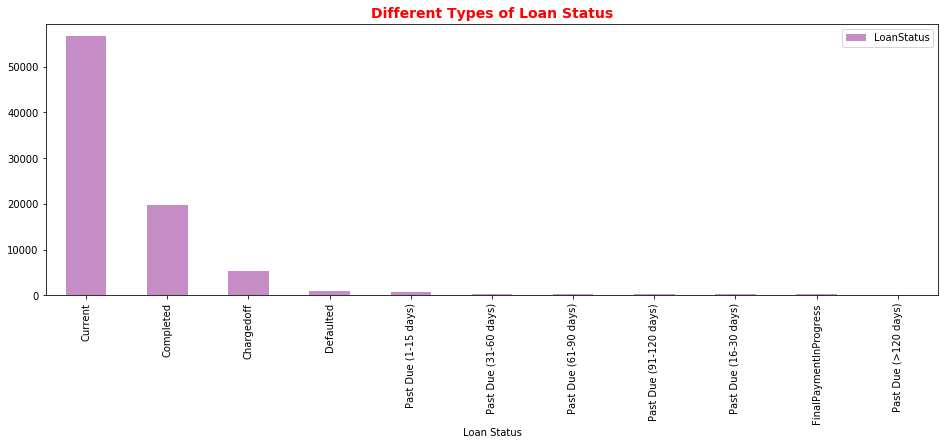

In [98]:
plt.figure(figsize=(16, 5))
loan_new['LoanStatus'].value_counts().plot(kind='bar',color='purple',alpha=0.45)
plt.title('Different Types of Loan Status',fontsize=14,color='red',fontweight='bold')
plt.xlabel('Loan Status')
plt.legend()

'Current' Loan Status has got the highest number of listings followed by Completed and Charged off.

<h2> 7. Available Bank Credit

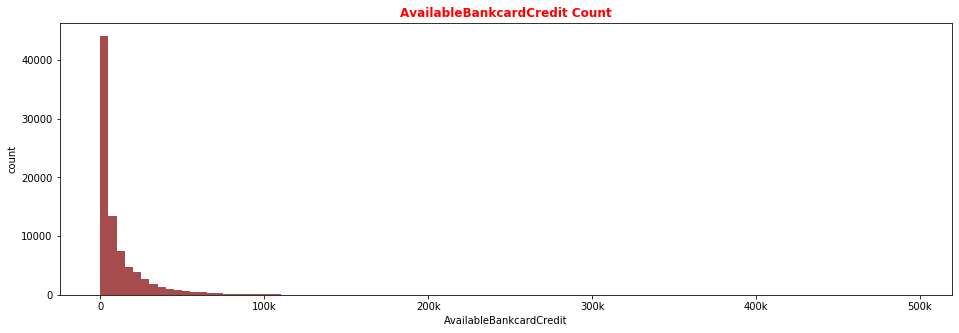

In [123]:
plt.figure(figsize=(16, 5))
bins = np.arange(0,loan_new['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = loan_new, x = 'AvailableBankcardCredit', bins = bins,color='maroon',alpha=0.7)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('AvailableBankcardCredit Count',fontsize=12,fontweight='bold',color='red')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');

Almost everybody's Available bank credit lies between 0 and 100k range.. Very few people are present with credit above 100k.

In [47]:
#Let us check those people whose Bank credit is > 150k
high_credit = loan_new[loan_new['AvailableBankcardCredit'] > 150000]
high_credit

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1801,2012-03-31 14:31:03.303,60,Completed,0.27246,0.2468,0.2368,0.23120,0.0890,0.14220,4.0,...,-136.49,0.00,0.00,0.00,0.0,1.0,0,0,0.0,4
2970,2013-01-01 08:59:27.927,60,Current,0.13247,0.1101,0.1001,0.09780,0.0199,0.07790,7.0,...,-249.88,0.00,0.00,0.00,0.0,1.0,0,0,0.0,540
4784,2013-02-08 05:26:23.540,60,Current,0.09959,0.0779,0.0679,0.06660,0.0149,0.05170,7.0,...,-92.20,0.00,0.00,0.00,0.0,1.0,0,0,0.0,146
6820,2013-07-31 12:07:08.773,36,Current,0.15833,0.1299,0.1199,0.11480,0.0399,0.07490,6.0,...,-27.05,0.00,0.00,0.00,0.0,1.0,0,0,0.0,92
7337,2014-01-27 09:44:37.153,36,Current,0.15223,0.1239,0.1139,0.10900,0.0399,0.06910,6.0,...,-19.18,0.00,0.00,0.00,0.0,1.0,0,0,0.0,367
7448,2012-06-26 13:14:31.870,12,Completed,0.09986,0.0628,0.0528,0.05280,0.0200,0.03280,6.0,...,-0.33,0.00,0.00,0.00,0.0,1.0,0,0,0.0,7
7875,2012-07-30 16:38:27.513,36,Current,0.35797,0.3177,0.3077,0.28960,0.1725,0.11710,1.0,...,-37.60,0.00,0.00,0.00,0.0,1.0,0,0,0.0,58
8352,2012-09-15 13:31:13.917,60,Chargedoff,0.17982,0.1564,0.1464,0.14060,0.0374,0.10320,6.0,...,-95.47,0.00,13597.76,13597.76,0.0,1.0,0,0,0.0,266
8570,2014-01-16 10:47:55.903,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,...,-10.19,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
10075,2011-10-19 12:10:20.973,36,Chargedoff,0.20200,0.1799,0.1699,0.16690,0.0595,0.10740,5.0,...,-75.26,-61.45,7739.02,7739.02,0.0,1.0,0,0,0.0,99


Text(0.5, 0, 'Available Bank credit')

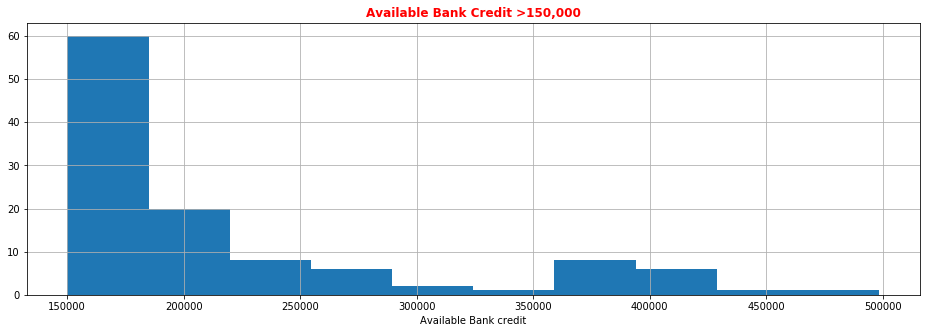

In [48]:
plt.figure(figsize=(16, 5))
high_credit['AvailableBankcardCredit'].hist()
plt.title('Available Bank Credit >150,000',color='red',fontweight='bold',fontsize=12) 
plt.xlabel('Available Bank credit')

There are very few people with available bank credit between 450000 and 500,000 as compared to the rest whose credit is between 150,000 and 175,000.

Text(0.5, 0, 'Borrower APR')

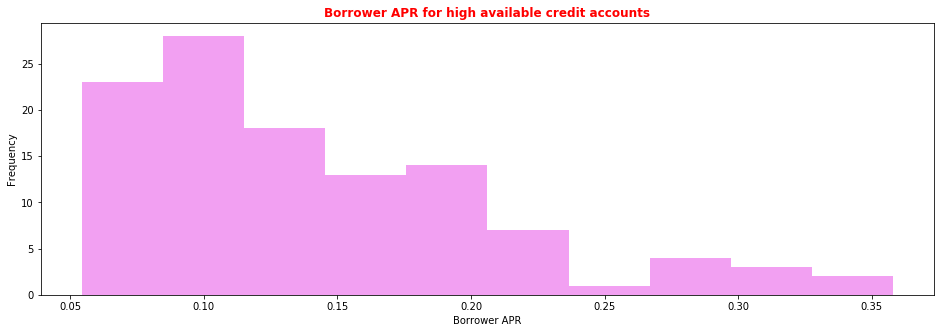

In [124]:
#Check BorrowerAPR for these  people
plt.figure(figsize=(16, 5))
high_credit['BorrowerAPR'].plot.hist(color='violet',alpha=0.76)
plt.title('Borrower APR for high available credit accounts',color='red',fontweight='bold',fontsize=12) 
plt.xlabel('Borrower APR')

In [127]:
high_credit['BorrowerAPR'].mean()

0.1430161946902655

In [128]:
high_credit['BorrowerAPR'].median()

0.13138

We can conclude from the above graph that for people with available credits>150,000, the Borrower APR is less compared to the rest. 
Their BorrowerAPR lies inbetween the range 7 and 35% with majoirty of them lying between 7 and 12% and the mean being 14% and median being 13%.

<h2>8. Prosper Score

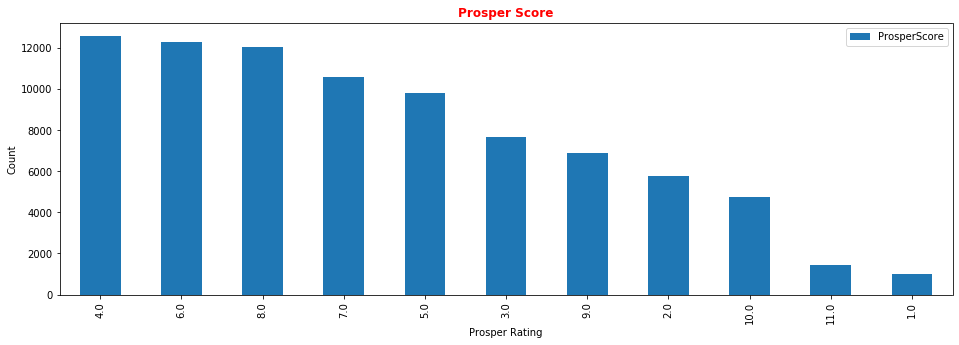

In [116]:
#Visualize prosper score
plt.figure(figsize=(16, 5))
loan_new['ProsperScore'].value_counts().plot(kind='bar')
plt.title('Prosper Score',fontweight='bold',fontsize=12,color='red')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')
plt.legend()


We observe that majority of the prosper ratings are 4, followed by 6 and 8. There is not much difference in the count of these three ratings. We also observe that there are few accounts which have been scored 11. This maybe due to mistype. Let us investigate these scores in detail.
Let us dig in deeperto find the BorrowerAPR for those with Prosper Score lie between 0 and 3.


In [131]:
#Fetch records where Prosperscore=11
highprosper=loan_new[loan_new['ProsperScore']==11]
highprosper

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListedYear
9,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2013
69,2014-01-25 12:07:54.537,60,Current,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
158,2014-02-12 16:31:25.340,36,Current,0.09469,0.0809,0.0709,0.06919,0.0199,0.04929,7.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
224,2014-01-10 07:24:44.853,36,Current,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
236,2013-11-02 01:29:09.810,36,Current,0.06726,0.0605,0.0505,0.05001,0.0074,0.04261,7.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,198,2013
277,2014-02-18 12:59:08.680,60,Current,0.15868,0.1355,0.1255,0.11932,0.0474,0.07192,5.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
476,2014-03-06 08:54:42.840,60,Current,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
491,2014-01-06 07:18:54.173,60,Current,0.17327,0.1500,0.1400,0.13203,0.0574,0.07463,5.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
532,2014-01-20 10:51:29.120,36,Current,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
554,2013-12-17 22:15:59.470,60,Current,0.09367,0.0809,0.0709,0.06919,0.0199,0.04929,7.0,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,411,2013


Text(0.5, 0, 'BorrowerAPR')

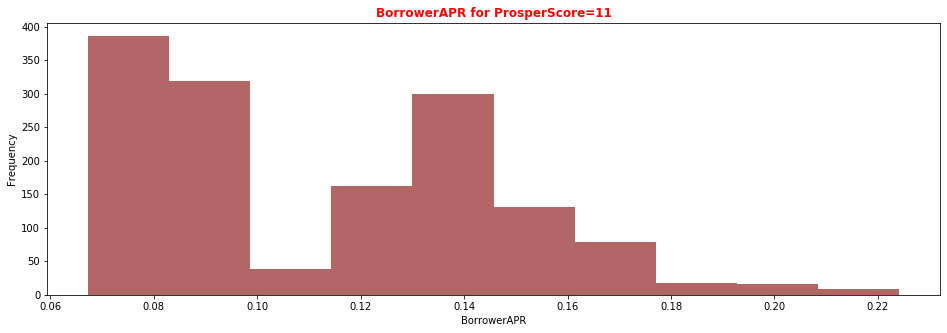

In [147]:
plt.figure(figsize=(16, 5))
highprosper['BorrowerAPR'].plot.hist(color='maroon',alpha=0.6)
plt.title('BorrowerAPR for ProsperScore=11',color='red',fontweight='bold')
plt.xlabel('BorrowerAPR')


In [52]:
#Fetchvalues between 0 and 4
prosper1=loan_new[loan_new['ProsperScore'].between(0, 3)]
prosper1

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
6,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
22,2013-01-30 09:36:13.783,36,Current,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,1.0,...,-35.80,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,94
25,2013-10-02 14:31:09.157,36,Current,0.30182,0.2629,0.2529,0.23057,0.1275,0.10307,2.0,...,-13.11,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,3
26,2013-02-12 18:07:31.690,60,Completed,0.30748,0.2809,0.2709,0.24730,0.1225,0.12480,2.0,...,-25.81,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,37
36,2013-11-27 11:46:18.690,36,Current,0.32446,0.2850,0.2750,0.25006,0.1475,0.10256,2.0,...,-16.84,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,3
67,2011-03-25 17:20:01.857,12,Completed,0.35843,0.2669,0.2569,0.24520,0.1300,0.11520,2.0,...,-14.79,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,32
73,2013-07-17 14:06:43.230,36,Current,0.26528,0.2272,0.2172,0.20000,0.0975,0.10250,3.0,...,-22.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,40
75,2013-06-18 15:19:26.643,36,Chargedoff,0.32538,0.2859,0.2759,0.25120,0.1375,0.11370,2.0,...,-3.40,0.00,3930.40,3930.40,0.00,1.0000,0,0,0.0,42
82,2013-07-18 05:09:06.357,36,Past Due (16-30 days),0.33286,0.2932,0.2832,0.25750,0.1425,0.11500,2.0,...,-19.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
87,2012-05-30 08:40:11.343,36,Completed,0.33973,0.2999,0.2899,0.27660,0.1490,0.12760,2.0,...,-45.97,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,35


Text(0, 0.5, 'Count')

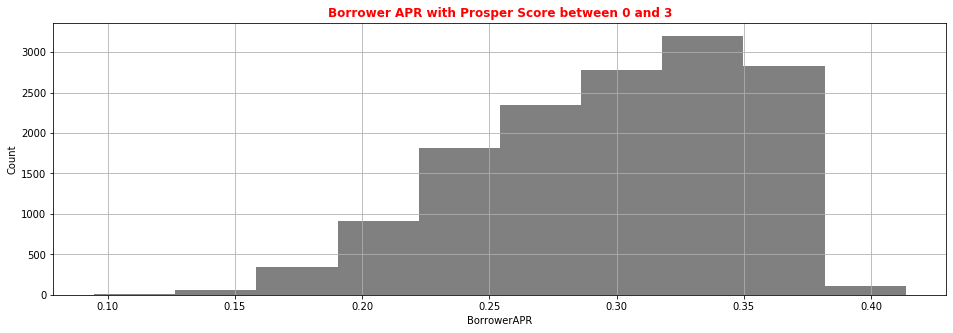

In [53]:
plt.figure(figsize=(16, 5))
prosper1['BorrowerAPR'].hist(color='grey')
plt.title('Borrower APR with Prosper Score between 0 and 3',fontweight='bold',fontsize=12,color='red')
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')

IT is clear from the above graph that as the prosper score reduces, the BorrowerAPR tends to be high.We see that majoirty of the people pay a  high BorrowerAPr of around 32 to 35%

<h2>9. Loan Purpose ( Listing Category)

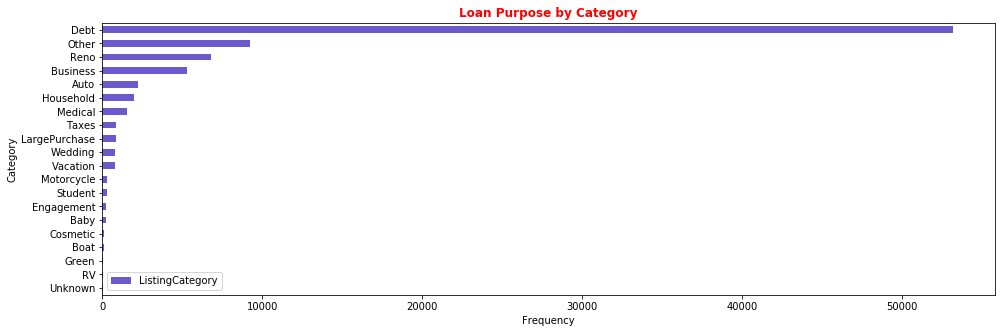

In [148]:
# Sorting category for a better looking graph
plt.figure(figsize=(16, 5))
loan_new["ListingCategory"].value_counts().sort_values().plot(kind='barh',color='slateblue')
plt.title('Loan Purpose by Category',color='red',fontweight='bold',fontsize=12)
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.legend()

Looking at the graph, it is evident that people take loans to clear off a debt. But, this is not really good since a new debt is created to pay off another debt.

<h2> 10. Credit Score

Text(0, 0.5, 'Frequency')

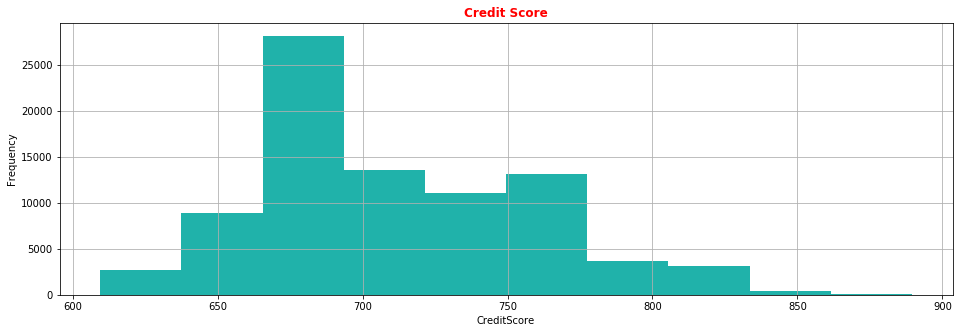

In [149]:
#Visualizing Credit Score
plt.figure(figsize=(16, 5))
bins = np.arange(0, loan_new['CreditScore'].max()+1, 1)
loan_new["CreditScore"].hist(color='lightseagreen')
plt.title('Credit Score',color='red',fontweight='bold',fontsize=12)
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

We see that majority lie between 660 nd 700. Very few have a credit score of 800 and above. Let us further investigate it

In [56]:
credit_greater=loan_new[loan_new['CreditScore']>=800]
credit_greater

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,-108.01,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,158
8,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,...,-16.77,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
9,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,...,-16.77,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
38,2013-08-13 16:11:17.173,36,Current,0.08930,0.0759,0.0659,0.06470,0.0149,0.04980,7.0,...,-33.08,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,151
99,2013-09-03 08:45:13.893,60,Current,0.10878,0.0869,0.0769,0.07510,0.0199,0.05520,7.0,...,-40.78,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,184
126,2014-02-06 13:42:06.617,36,Current,0.13799,0.1099,0.0999,0.09628,0.0324,0.06388,6.0,...,0.00,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
147,2009-09-04 13:01:25.240,36,Completed,0.09191,0.0712,0.0612,0.05520,0.0060,0.05520,7.0,...,-6.53,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,132
163,2012-11-16 11:34:51.943,36,Current,0.09484,0.0814,0.0714,0.07010,0.0149,0.05520,7.0,...,-128.60,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,134
165,2010-03-19 13:48:25.113,36,Completed,0.09643,0.0930,0.0830,0.06800,0.0150,0.06800,7.0,...,-145.38,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,413
185,2010-07-29 16:13:12.967,36,Defaulted,0.27119,0.2365,0.2265,0.13410,0.0870,0.13410,4.0,...,-67.39,0.0,3844.41,3844.41,685.0,1.0000,0,0,0.0,243


Text(0, 0.5, 'Frequency')

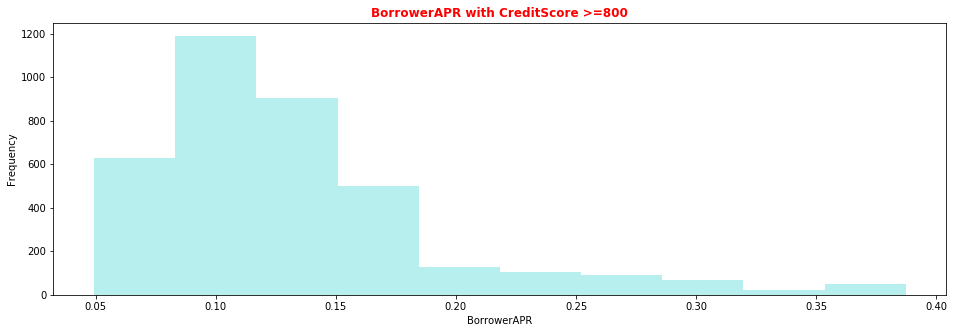

In [159]:
#Plotting it visually
plt.figure(figsize=(16, 5))
credit_greater['BorrowerAPR'].plot.hist(color='paleturquoise',alpha=0.9)
plt.title('BorrowerAPR with CreditScore >=800',color='red',fontweight='bold',fontsize=12)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')

As expected, the BorrowerAPR tend to be less for people with high credit scores

<h3>Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I explored variables which seemed important for determining the BorrowerAPR. From the univariate explorations done above, what I observed are listed below:
- The Borrower APR is high at around 41.35% for majority of prosper Scores>4.
- The most frequent Prosper rating is C(21.6%) followed by B(18.36%) and A(17.14%)
- Majority of people with prosperscore = 9 under Prosper Score C rating and with tend to pay borrowerAPR >35% than the those with rating 5 , 8, 4.
- If the current Delinquency is high, their BorrowerAPR is high as well ranging between 30% and 38%. 
- Majority of the people's income range lies between 50,000-75,000. As the salary increases,there is a dip in the number of listings.
- The top most occupation listed is 'Others' followed by 'Professional'
- Most of them take a loan to pay off a debt .

Since my main point of interest was 'BorrowedAPR' , I tried to look at unusually high or low figures of certain coolumns and tried to get their respective Borrower APR's just to check if that variable had any influence on the APR being high or low.
- I dug in deeper and created new dataframes fo variables with outliers and plotted them finally.
    

<h3>Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

BorrowedAPR, 'Availablebankcredit', Prosper score are Right skewed.

<h2>Bivariate Exploration

<h2> 1. Comparing correlations between different numerical variables

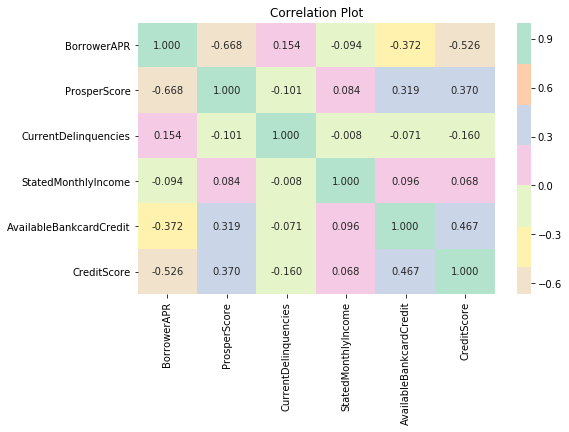

In [117]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'CurrentDelinquencies', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit','CreditScore']

plt.figure(figsize = [8, 5])
sns.heatmap(loan_new[num_vars].corr(), annot = True, fmt = '.3f',cmap = 'Pastel2_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

- From the above correlation plot, we see that there is no strong positive correlation between any of the variables
- We observe that Borrower APR andAvailable Bankcard Credit have a strong negative correlation. It makes sense because as the Available bankcard credit is high, the BorrowerAPR must go down since that person has enough money to repay his loan.
- Similarly prosper score and BorrowerAPR share a strong negative Correlation. It means , as the Prosper Score increases,BorrowerAPR decreases. 
- We also observe a similar strong negative correlation between BorrowerAPR and CreditScore. 

<h2> 2. Comparing Prosper Scores with Credit Scores

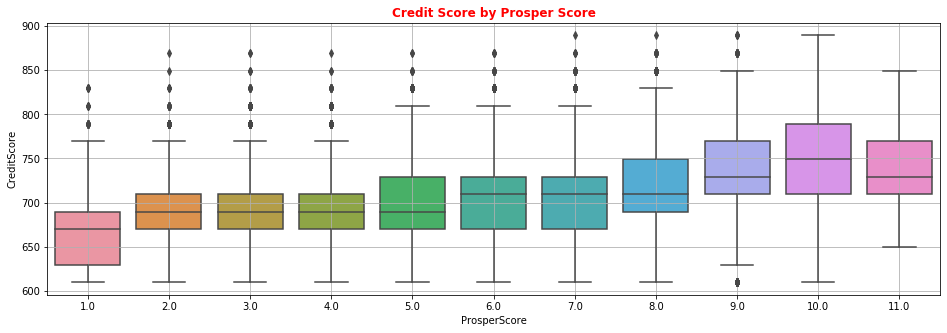

In [105]:
plt.figure(figsize = [16, 5])
sns.boxplot(data=loan_new, x='ProsperScore',y='CreditScore')
plt.title("Credit Score by Prosper Score",color='red',fontsize=12,fontweight='bold')
plt.grid()

Prosper Score is evenly distributed for all the values ranging from 1 to 11. Also, when looking at the correlation plot, we didn't really find high correlation between these two variables.

<h2>3. Comparing BorrowerAPR and ProsperScore

Text(0, 0.5, 'ProsperScore')

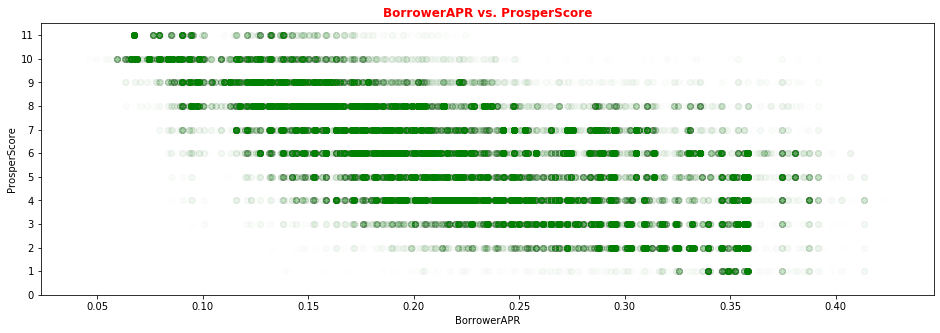

In [108]:
plt.figure(figsize = [16, 5]) 
plt.scatter(data = loan_new, x = 'BorrowerAPR', y = 'ProsperScore',color='green',alpha=0.007)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore',color='red',fontweight='bold',fontsize=12)
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


It is evident that as Prosper Scores increase, Borrower APR decreases. We see the same pattern above.

<h2>4. Comparing BorrowerAPR with CreditScore

Text(0.5, 1.0, 'BorrowerAPR by Credit Score')

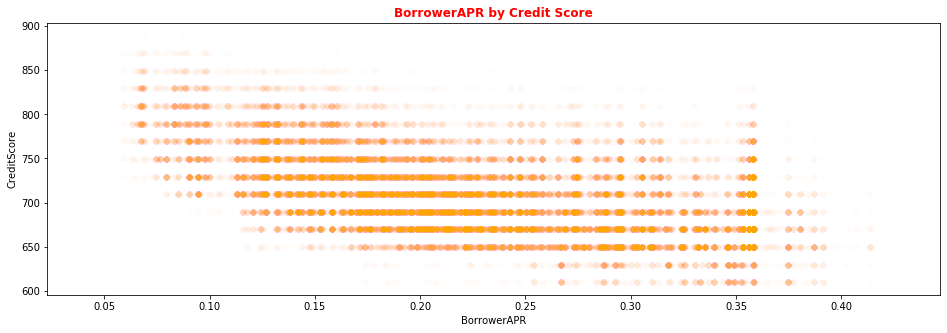

In [195]:
plt.figure(figsize = [16, 5])
sns.scatterplot(data=loan_new, x='BorrowerAPR',y='CreditScore',alpha=0.006,color='orange')
plt.title("BorrowerAPR by Credit Score",color='red',fontweight='bold')


Similar to the ProsperScore, this graph says the same thing. BorrowerAPR decreases as creditscore increases.

<h2>5. BorrowerAPR trend over last few years

In [69]:
#Extracting Year from the Listing Creation Date
loan_new['ListingCreationDate']
loan_new['ListedYear']=loan_new['ListingCreationDate'].dt.year

C:\Users\arryg\Anaconda3\envs\shweta\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
#confirming changes
loan_new.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListedYear
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013
5,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2013
6,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2013


In [80]:
#Count of each year
loan_new['ListedYear'].value_counts()

2013    35413
2012    19556
2011    11442
2014    10734
2010     5530
2009     2178
Name: ListedYear, dtype: int64

Text(0.5, 1.0, 'BorrowerAPR Trend by Year')

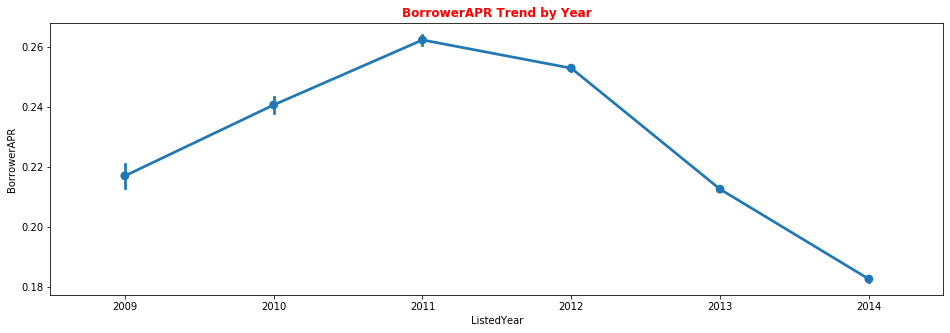

In [111]:
#Plot visually
plt.figure(figsize = [16, 5])
sns.pointplot(data=loan_new, x='ListedYear', y='BorrowerAPR');
plt.title("BorrowerAPR Trend by Year",color='red',fontsize=12,fontweight='bold')

USed a pointplot to analyse the trend of Borrowed APR every year. The BorrowerAPR from the above graph was at its peak during the year 2011 and reduced in 2014 to 18% interest on an average

<h3>Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I compared the variables below to uncover patterns relating to BorrowerAPR.
- ProsperScore
- CreditScore
- Borrower APR
- ListedCreation Date in Year
- Available Bank Credit

From the variables explored, I observed the following.
1. No strong positive correlations were observed between any of the variables from the correlation plot, but we did find few variables which showed strong negative correlation like CreditScore with BorrowerAPR and ProsperScore with BorrowerAPR , AvialbleBank credit and BorrowerAPR.
2. Tried to compare if there was any relationship with CreditScore and ProsperScore with each other. Didn't find any trend for these two variables copared with each other. 
3. Checked BorrowerAPR trend by year to see if there was an increase or decrease in the intrest every year. Discovered that in 2011, the BorrowerAPR was at it's highest with the average BorrowerAPR being 26% and it was at it's lowest in the year 2014 at 18%

<h3>Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

CreditScore, AvailableBankCredit are positively correlated to ProsperScore and negatively correlated to BorrowerAPR

<h1>Multivariate Analysis

<h2>1. Compare BorrowerAPR wrt ProsperScore and CreditScore

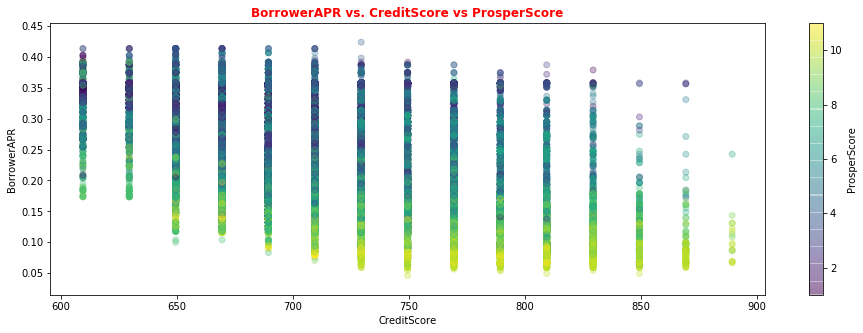

In [96]:
plt.figure(figsize = [16, 5]) 
plt.scatter(data = loan_new, x = 'CreditScore', y = 'BorrowerAPR',c='ProsperScore', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScore vs ProsperScore',color='red',fontweight='bold')
plt.xlabel('CreditScore')
plt.colorbar(label = 'ProsperScore')
plt.ylabel('BorrowerAPR');

We can infer from the above graph as below:

- Comparing CreditScore with BorrowerAPR, we see that as the creditscore increases, BorrowerAPR decreases.
- Now with the Prosper score added, we observe a similar pattern. Looking at the color with yellow being the highest prosper score, we observe that those with higher prosper scores, tend to have lower BorrowerAPR.

<h2>2. BorrowerAPR wrt ProsperGrade and Prosper Rating

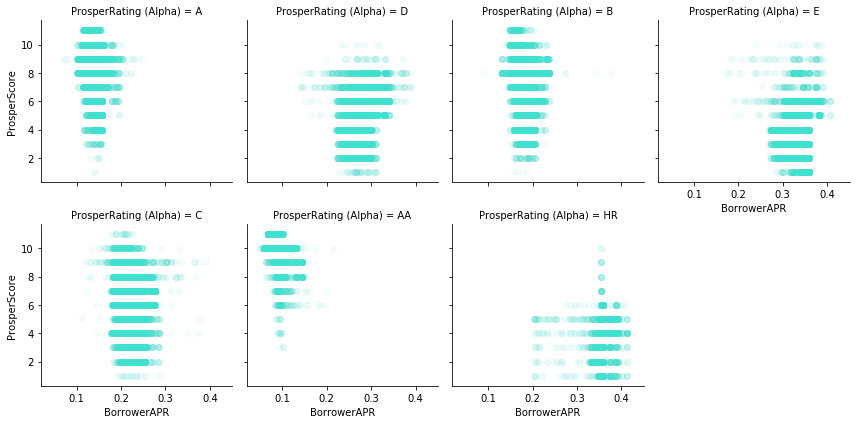

In [196]:
#Visualizing BorrowerAPR and Prosper Score for each prosper Grade
new = sns.FacetGrid(data = loan_new, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
new.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.05,color='turquoise')
new.set_xlabels('BorrowerAPR')
new.set_ylabels('ProsperScore')
plt.show()

From the above plots, we see that for Prosper Rating A, the BorrowerAPR is the lowest and for Prosper Rating = HR, the Borrower APR is the highest touching 40% and above.

<h2>3. Comparing Employment status wrt BorrowerAPR and Listed Year

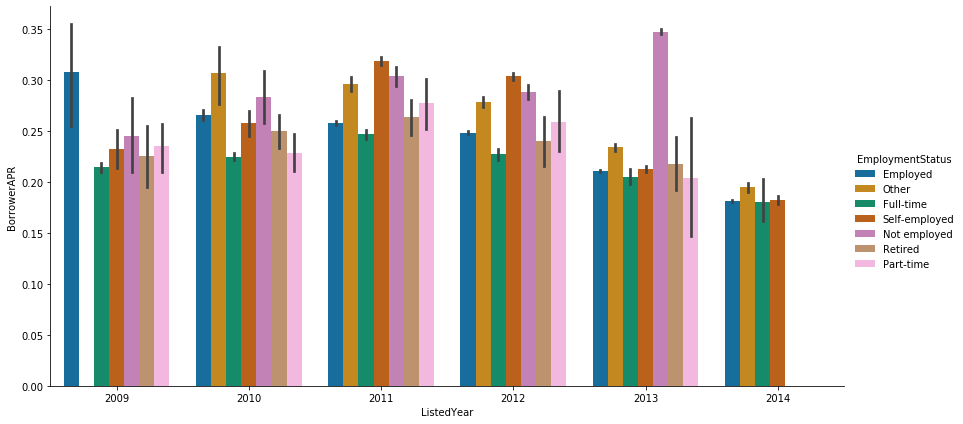

In [194]:
g = sns.factorplot('ListedYear','BorrowerAPR','EmploymentStatus',data=loan_new,kind='bar',height=6,aspect=2,palette='colorblind');

From the above plot, we see that in the year 2009, people who were employed paid the highest BorrowerAPR and there was no mention of 'Other' in that year under this category. In the year 2013, 'Not employed seemed to have paid the highest Borrower APR' than the rest. Overall, 2014 saw a decline in the interest paid for all the sectors

<h3>Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We can infer from the above graph as below:
- Both CreditScore and ProsperScore are negatively correlated to Borrower APR
- For Prosper Rating A, the BorrowerAPR is the lowest and for Prosper Rating = HR, the Borrower APR is the highest 
- In the year 2009, people who were employed paid the highest BorrowerAPR and there was no mention of 'Other' in that year under this category. In the year 2013, 'Not employed' seemed to have paid the highest Borrower APR' than the rest. Overall, 2014 saw a decline in the interest paid for all the categories.
    